In [1]:
import awkward as ak
import numpy as np
import coffea
import os
from plugins import handleData

print(coffea.__version__)
from coffea import util
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import hist

# testFiles = [
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_170to300_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/0CDD30E0-B953-E54B-BB7A-BFB45BE6EC93.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_300to470_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/120000/3788BBD3-3B70-BE48-B01A-4FA395E1E0B6.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_470to600_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/F6B6A983-3E2B-7B4D-A2CE-E03AB6E32387.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_600to800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/FDF7FBE4-9226-994A-BD45-29995A3CD62F.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/2CEB03D7-5B1A-EE46-9C21-13ED3E349AF4.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/DB87A517-0584-1A41-BB18-AAE7C9AAE5B8.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/BFE2E7E9-82CB-FE47-9B43-EBA5C373AF60.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/70000/5213B536-BAA1-CC43-A58A-B1E41E2680F5.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/E8400F91-3216-EA46-A9F1-8CC7EF5261B0.root",
# "root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/B21BFDD8-B878-784C-AFB6-5CDE131F5C39.root"
# ]

# redirector = 'root://xcache/'
redirector='root://cmsxrootd.fnal.gov/'
# files = handleData('fileset_QCD.json', redirector, testing = True, data = False)
# # files_test = handleData('fileset_QCD.json', redirector, testing = False, data = False)

events = NanoEventsFactory.from_root(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_800to1000_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/48C7B9A8-400F-5D4B-A8D5-F9EC247A9880.root', schemaclass=NanoAODSchema).events()
# print(events.HLT.fields)
#may have to put in weights by hand
# print(events.Generator.weight)

0.7.21


In [2]:
from plugins import *
from dijetProcessor import makeDijetHists
from dask.distributed import Client
import pickle
#### WE'RE MISSING 2016B ver2 -- AK8 PF HLT is missing need to use AK4 trigger isntead

data = True
winterfell = False
dask = True
testing = False
casa = False
year = 2018
processor = makeDijetHists(data = data)
datastring = "JetHT" if processor.do_gen == False else "QCDsim"
if year == 2016 or year == 2017 or year == 2018:
    year_str = str(year)
elif year == "2016" or year == "2016APV" or year == "2017" or year == "2018":
    year_str = year
else:
    year_str = "All"
if processor.do_gen==True and winterfell:
    filename = "QCD_flat_files.json"
elif processor.do_gen==True:
    filename = "fileset_QCD.json"
else:
    filename = "datasets_UL_NANOAOD.json"
if testing and not data:
    fname = 'coffeaOutput/dijetHistsTest_wXSscaling_{}_pt{}_rapidity{}jesjec{}.pkl'.format(datastring, processor.ptcut, processor.ycut, year_str)
elif testing and data:
    fname = 'coffeaOutput/dijetHistsTest{}_pt{}_rapidity{}jesjec{}.pkl'.format(datastring, processor.ptcut, processor.ycut, year_str)
elif not testing and data:
    fname = 'coffeaOutput/dijetHists_{}_pt{}_rapidity{}jesjec{}.pkl'.format(datastring, processor.ptcut, processor.ycut, year_str)
else:
    fname = 'coffeaOutput/dijetHists_wXSscaling_{}_pt{}_rapidity{}jesjec{}.pkl'.format(datastring, processor.ptcut, processor.ycut, year_str)

0.7.21
2.7.2
Data:  True  gen  False


In [3]:
result = runCoffeaJob(processor, jsonFile = filename, casa = casa, winterfell = winterfell, year = year,
                      testing = testing, dask = dask, data = not processor.do_gen)
with open(fname, "wb") as f:
    pickle.dump( result, f)

Running on LPC Condor


/opt/conda/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40135 instead
  warnings.warn(


{'jet_mass': Hist(#######################] | 100% Completed | 55min 29.0s
  StrCategory([], growth=True, name='dataset', label='Dataset'),
  StrCategory([], growth=True, name='jetNumb', label='Jet'),
  StrCategory([], growth=True, name='partonFlav', label='Parton Flavour'),
  Variable(array([0.00e+00, 5.00e-01, 1.00e+00, 3.00e+00, 5.00e+00, 7.50e+00,
       1.00e+01, 1.50e+01, 2.00e+01, 3.00e+01, 4.00e+01, 5.00e+01,
       6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01, 1.00e+02, 1.25e+02,
       1.50e+02, 1.75e+02, 2.00e+02, 2.25e+02, 2.50e+02, 6.25e+02,
       1.00e+03]), name='mreco', label='m_{RECO} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0), 'jet_pt': Hist(
  StrCategory([], growth=True, name='dataset', label='Dataset'),
  StrCategory([], growth=True, name='jetNumb', label='Jet'),
  StrCategory([], growth=True, name='partonFlav', label='Parton Flavour'),
  Variable([200, 280, 360, 450, 520, 630, 690, 750, 800, 1300, 13000], name='ptreco', label='p_{T,RECO} (GeV)'

In [4]:
# fname = 'coffeaOutput/dijetHistsTest_QCDsim_30.0_2.5.pkl'
with open(fname, "rb") as f:
    result = pickle.load( f )
# result=result[0]
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,10)

KeyError: "'nominal' not in axis"

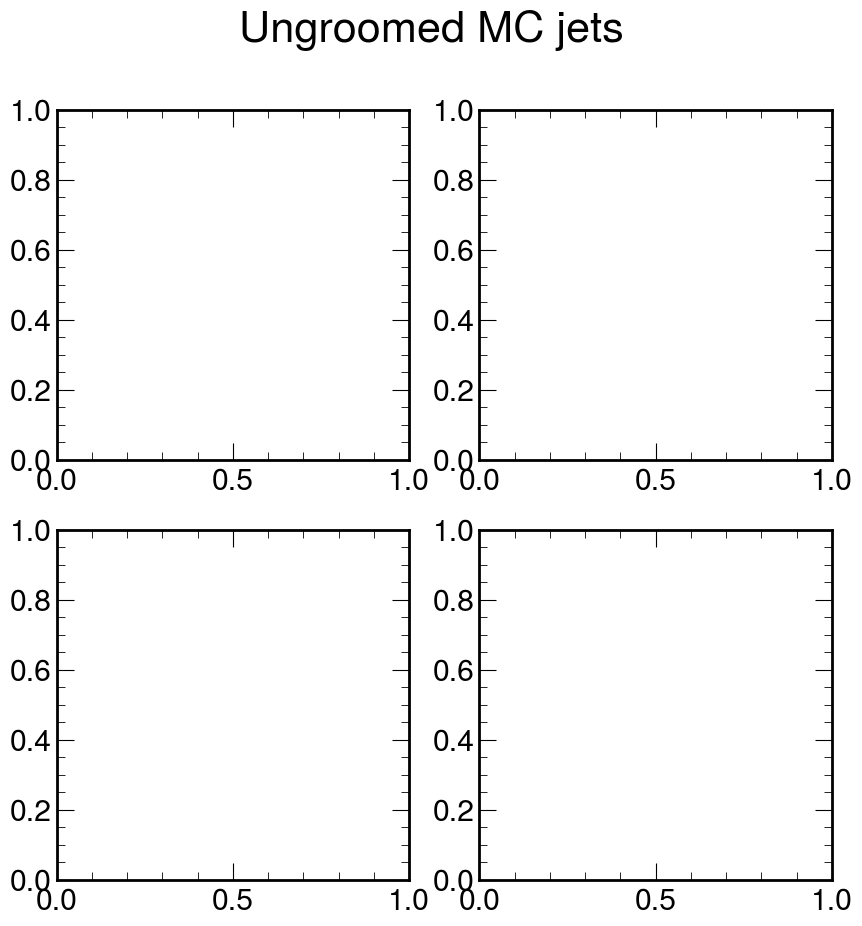

In [5]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed MC jets')

result['response_matrix_u'][{'dataset':sum, 'syst':"nominal"}].project('ptreco').plot1d(ax=axs[0,0], binwnorm=True)
result['response_matrix_u'][{'dataset':sum, 'syst':"jesUp"}].project('ptreco').plot1d(ax=axs[0,0], binwnorm=True)
result['response_matrix_u'][{'dataset':sum}].project('ptgen').plot1d(ax=axs[0,1])
result['response_matrix_u'][{'dataset':sum}].project('mgen').plot1d(ax=axs[1,0], binwnorm=True)
result['response_matrix_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1])

In [ ]:
s = result['response_matrix_u'][{'dataset':sum}].stack("syst")
s.project('ptreco').plot(binwnorm=True)
plt.legend()
plt.show()

In [ ]:
# fname = 'coffeaOutput/dijetHistsTest_JetHT_30.0_2.5.pkl'
with open(fname, "rb") as f:
    result = pickle.load( f )
# result=result[0]
import matplotlib.pyplot as plt
%matplotlib inline
#import mplhep as hep
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed Data jets')
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,0], binwnorm=True)
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[0,1])
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0], binwnorm=True)
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1])

In [ ]:
numerator = result['jet_pt'][{'partonFlav':'Gluon'}].project('ptreco')
denominator = result['jet_pt'].project('ptreco')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_ax = fig.add_subplot(grid[0])
subplot_ax = fig.add_subplot(grid[1], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of pT')

In [ ]:
numerator = result['jet_eta'][{'partonFlav':'Gluon'}].project('eta')
denominator = result['jet_eta'].project('eta')
print(numerator.values(), denominator.values())
numerator.label = r'$\epsilon$'
numerator.label = r'$\epsilon$'
fig = plt.gcf()
grid = fig.add_gridspec(2, 1, hspace=0, height_ratios=[3, 1])

main_axis = fig.add_subplot(grid[0])
ratio_ax = fig.add_subplot(grid[1], sharex=main_axis)
plt.setp(main_axis.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_axis,"ratio_ax":ratio_ax}
)

plt.xlabel(r'$\eta$')
plt.ylabel("Gluon fraction")
main_axis.set_title('Gluon content as a function of eta')


In [ ]:
#sum entries in bins --> plot as y-axis
plt.rcParams["figure.figsize"] = (20,5)


fig, axs = plt.subplots(1, 3)
result['jet_mass'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")

fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(2, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")

In [ ]:
njets=result['cutflow']['nJets']
ngluonjets=result['cutflow']['nGluonJets']
print(result['cutflow'])
print("Gluon purity:", ngluonjets/njets)

In [ ]:
response_matrix_u_values = result['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
response_matrix_u_up = result['response_matrix_u'][{'syst':'jesUp'}].project("ptreco", "mreco", "ptgen", "mgen").values().reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
response_matrix_u_down = result['response_matrix_u'][{'syst':'jesDown'}].project("ptreco", "mreco", "ptgen", "mgen").values().reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
response_matrix_u_nom = result['response_matrix_u'][{'syst':'nominal'}].project("ptreco", "mreco", "ptgen", "mgen").values().reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
response_matrix_g_values = result['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()

In [ ]:
nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape

In [ ]:
response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
print(ak.max(response_matrix_u_final))

In [ ]:
response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow( np.log(response_matrix_u_final+1), aspect="auto", cmap="Blues", interpolation='nearest' )
axs[1,0].imshow( (np.log(response_matrix_u_up+1)-np.log(response_matrix_u_final+1)+1), aspect="auto", cmap="Blues", interpolation='nearest' )
axs[0,1].imshow( np.log(response_matrix_u_down+1), aspect="auto", cmap="Blues", interpolation='nearest' )
axs[1,1].imshow( np.log(response_matrix_u_nom+1), aspect="auto", cmap="Blues", interpolation='nearest' )
plt.xlabel("RECO", fontsize=20)
plt.ylabel("GEN", fontsize=20)
plt.tick_params(labelsize=20)

In [ ]:
plt.figure(figsize = (40,80))
plt.imshow( np.log(response_matrix_g_final+1), aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

In [ ]:
plt.figure(figsize = (40,80))
plt.imshow( response_matrix_u_final, aspect="equal", cmap="Blues" )
plt.xlabel("RECO", fontsize=50)
plt.ylabel("GEN", fontsize=50)
plt.tick_params(labelsize=40)

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 